# Load a sampler output file

A quick example of how to load a sampler output file and make some basic plots.

For more information on working with sampler output files, see the relevant section in the [documentation](https://gcfit.readthedocs.io/en/develop/usage/analysis_usage.html).

`GCfit` can be install via pip:

```bash
pip install gcfit
```

See also the [GCfit GitHub repository](https://github.com/nmdickson/GCfit) for the development branch and source code.

In [1]:
import gcfit.analysis
import matplotlib.pyplot as plt
import numpy as np

# load in the datafile
obs = gcfit.Observations("NGC0104")

# open the sampler output
sampler = gcfit.analysis.NestedRun("./47Tuc/AllData/NGC0104_AllData_sampler.hdf", obs)

# initialize a visualization object
viz = sampler.get_CImodel(load=True)

In [2]:
# this step will be slow
sampler.print_summary()

./47Tuc/AllData/NGC0104_AllData_sampler.hdf - Run Results
             Mean      |   Std. Dev.   
   W0 = 6.081 (±0.001) | 0.074 (±0.011)
    M = 0.917 (±0.000) | 0.006 (±0.001)
   rh = 6.714 (±0.001) | 0.037 (±0.005)
   ra = 1.757 (±0.001) | 0.049 (±0.013)
    g = 1.524 (±0.001) | 0.024 (±0.004)
delta = 0.468 (±0.000) | 0.011 (±0.001)
   s2 = 0.002 (±0.000) | 0.003 (±0.001)
    F = 2.583 (±0.002) | 0.116 (±0.019)
   a1 = 0.400 (±0.000) | 0.022 (±0.003)
   a2 = 1.289 (±0.001) | 0.036 (±0.005)
   a3 = 2.193 (±0.000) | 0.019 (±0.003)
BHret = 0.207 (±0.002) | 0.078 (±0.014)
    d = 4.456 (±0.001) | 0.015 (±0.002)

Run Setup
Fixed parameters:
    None
Excluded components:
    None

Run Metadata
   ESS = 5098.79
   AIC = 499.43
   BIC = 86019.67
 logL0 = -794.86
  logz = -868.53 (±0.66)
 niter = 13484
 ncall = 604414
   eff = 2.23


/home/peter/anaconda3/envs/gcfit/lib/python3.11/site-packages/gcfit/probabilities/pulsars.py:425: RuntimeWarning: invalid value encountered in log10
  Pdot_int = np.log10(Pdot_int)


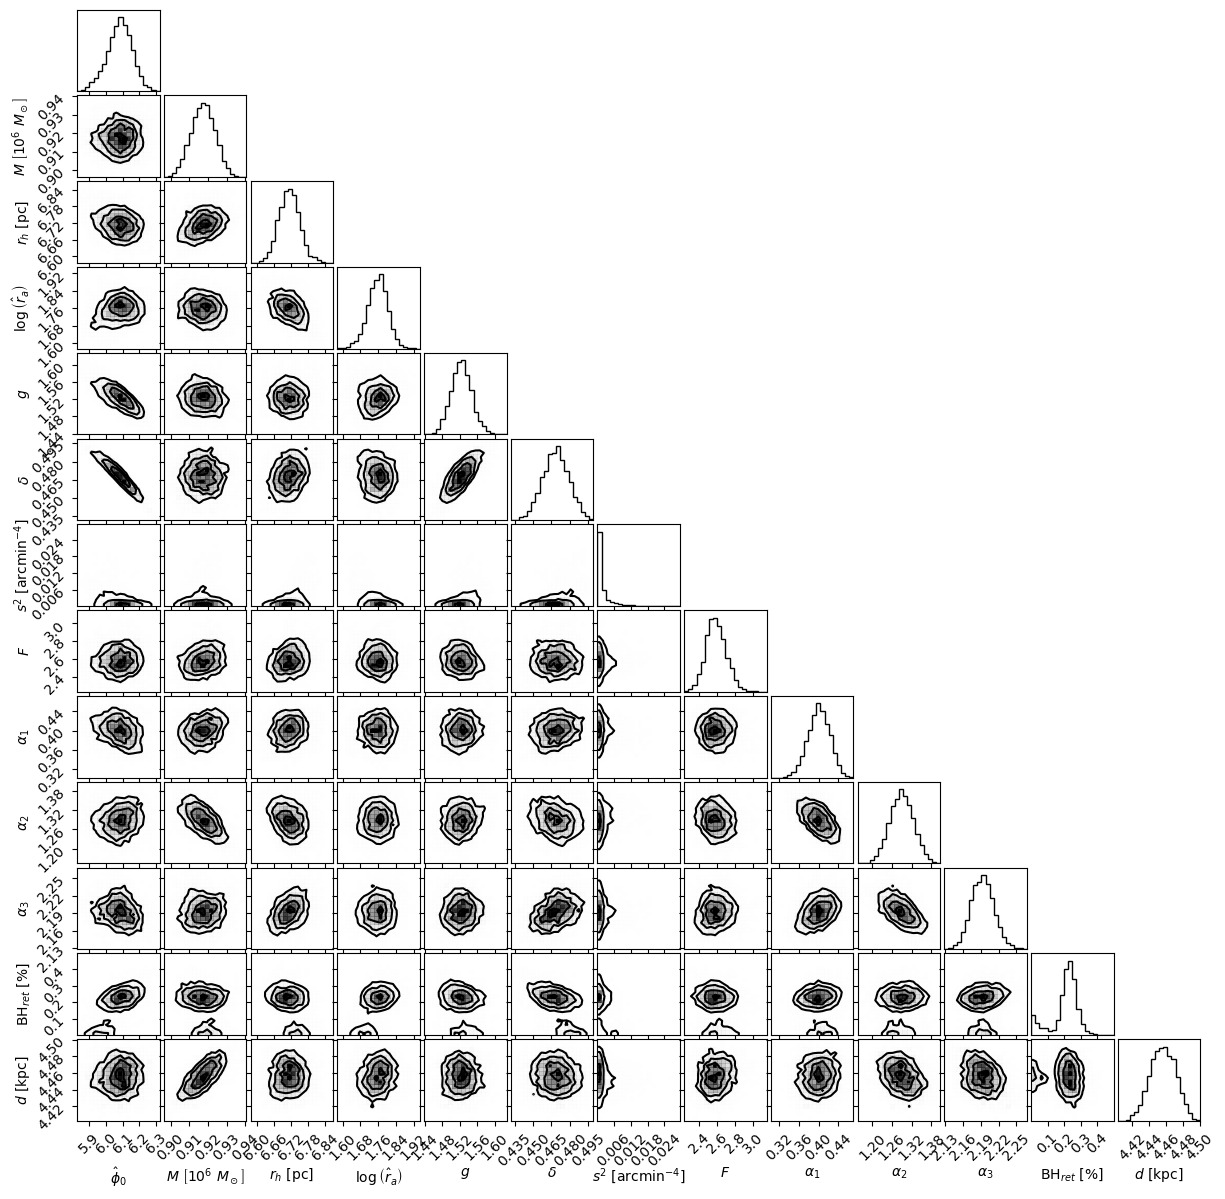

In [3]:
# corner plot
fig = plt.figure(figsize=(12, 12))
_ = sampler.plot_marginals(fig=fig)

# Plotting the models

### Plot the models against the data

<Figure size 1200x1200 with 0 Axes>

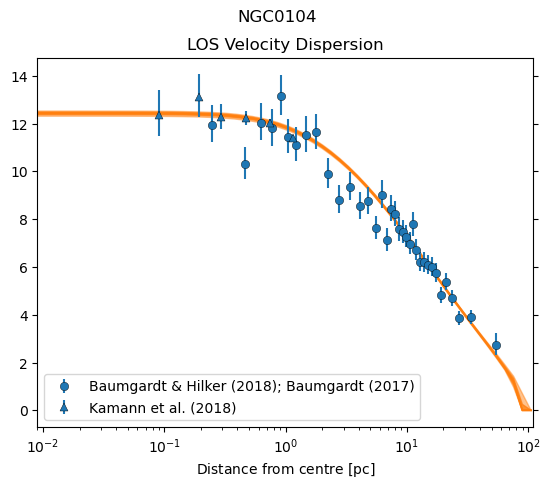

In [4]:
fig = plt.figure(figsize=(12, 12))
_ = viz.plot_LOS()

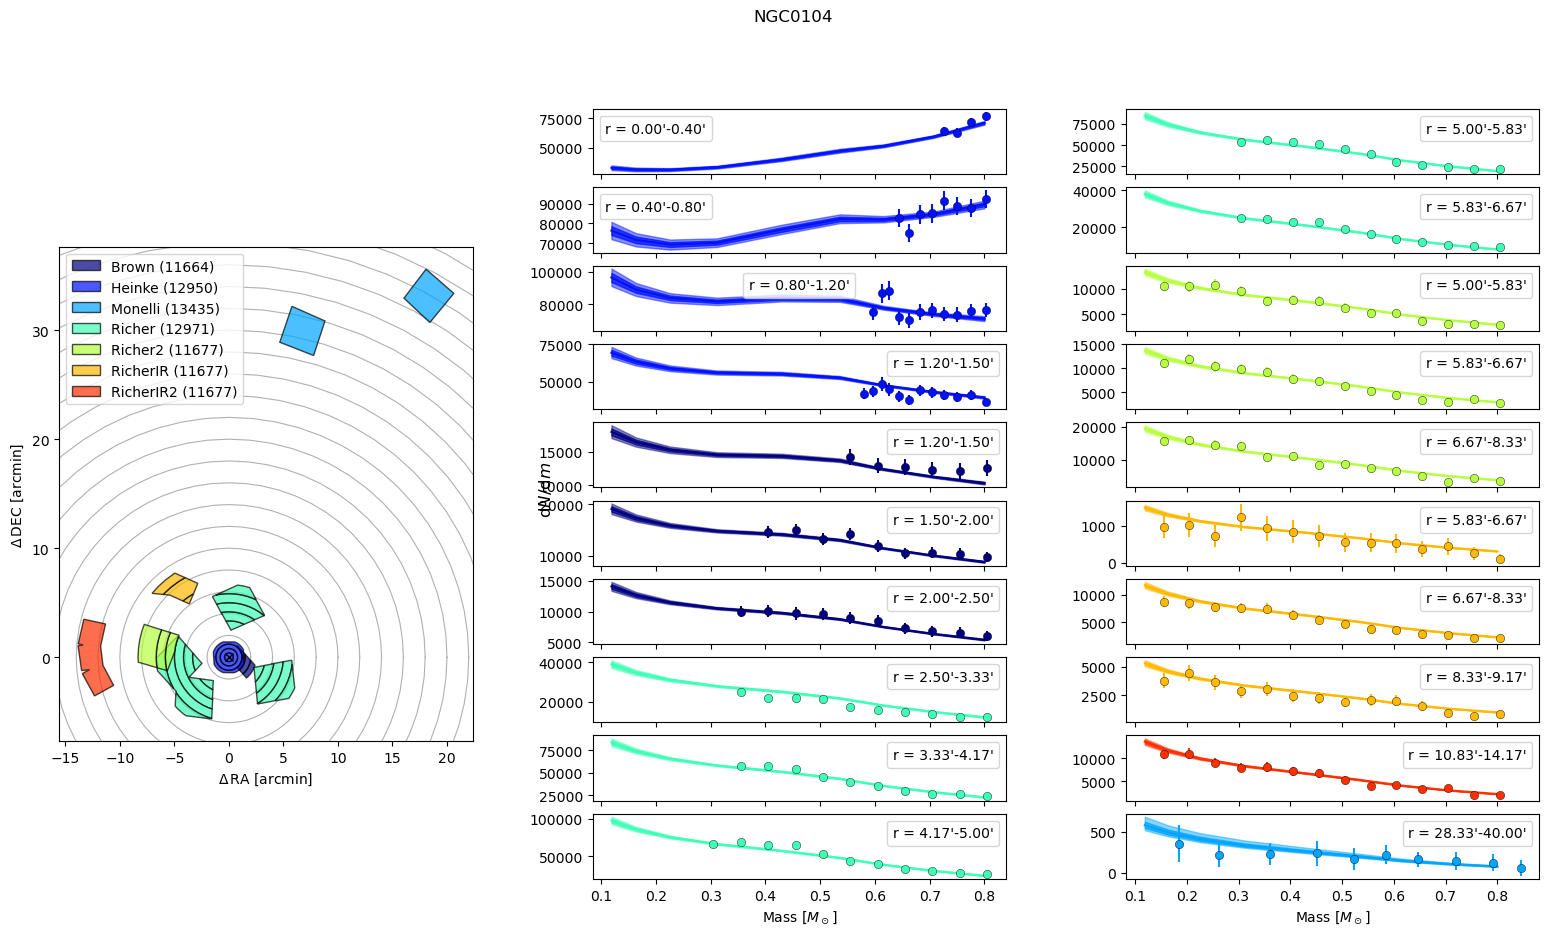

In [5]:
fig = plt.figure(figsize=(16, 10))
_ = viz.plot_mass_func(fig=fig, show_fields=True, PI_legend=True)

### Plotting Model Quantities

(1, 5000000.0)

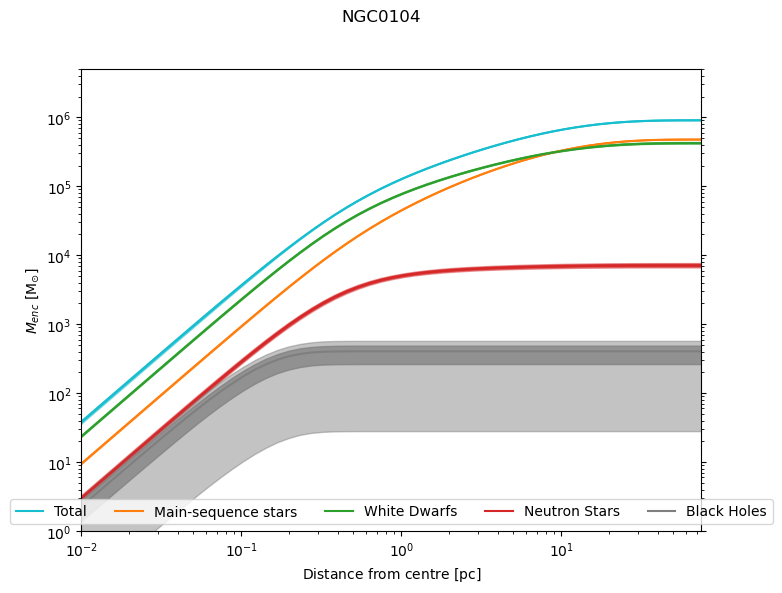

In [6]:
# plot the enclosed mass profiles

fig = plt.figure(figsize=(8, 6))
_ = viz.plot_cumulative_mass(fig=fig)
plt.xlim(1e-2, 75)
plt.ylim(1, 5e6)

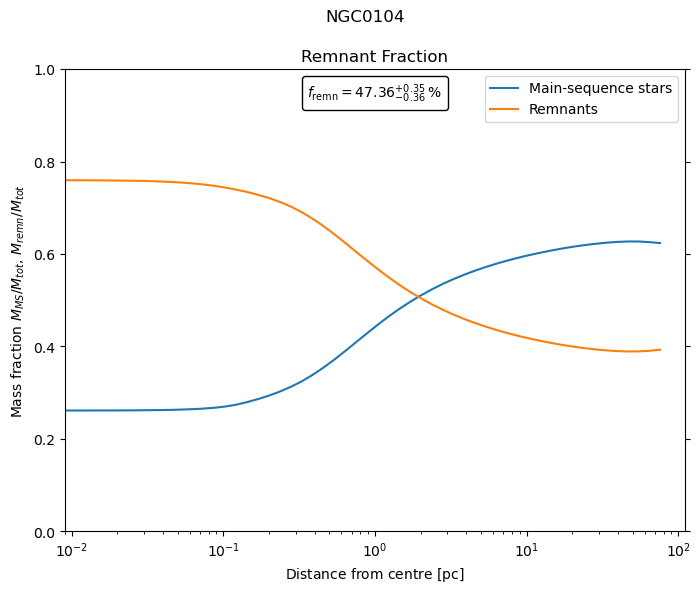

In [7]:
# plot the remnant fraction
fig = plt.figure(figsize=(8, 6))
_ = viz.plot_remnant_fraction(fig=fig)

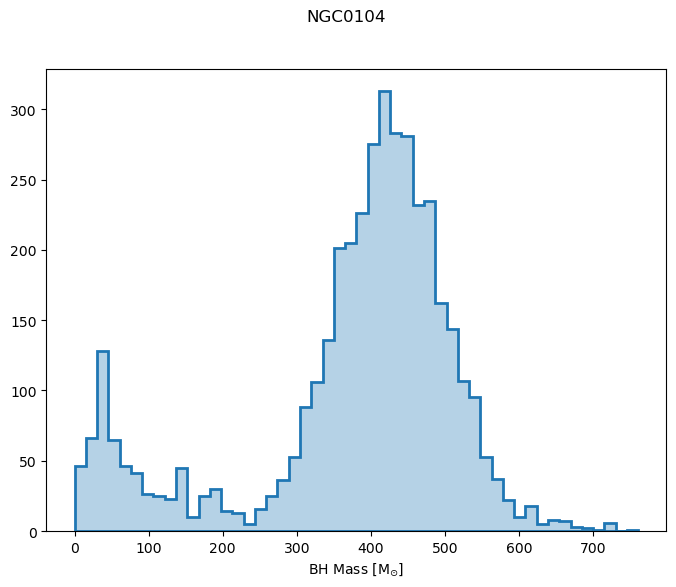

In [8]:
# plot BH mass
fig = plt.figure(figsize=(8, 6))
_ = viz.plot_BH_mass(fig=fig)

In [9]:
# you can also access these quantities directly
np.median(viz.BH_mass)

<Quantity 412.27741444 solMass>